## NUMII 01: Introduction to Monte Carlo (MC) Integration

Session references
1. Wasserman - [All of Statistics](references/wasserman_all_of_statistics.pdf)
2. Telmo Correa - [Exercises](https://github.com/telmo-correa/all-of-statistics) of Wasserman book
3. Handwritten [notes](handwritten/numii01_mc1.pdf)

Course information
- Two parts: Monte Carlo simulation (marcello) and molecular dynamics (ali)
- Final project: end March to early April
- use Python 3.x
***
***

### A.&emsp; Introduction

MC is about the estimation of integrals and sums. An example would be the partition function:

$$Z = \sum_{\sigma_i}\exp{\left(-\beta\varepsilon\sigma_i\right)}$$

- Sum can be messy. An N-spin Ising chain, $\sigma_i = \pm 1$, has $2^N$ configurations.

- Error estimation is needed for direct summations.

- When talking about MC, __errors__ are more important than expectation values. We see how errors are calculated using the Hit-or-Miss method.
***

### B.&emsp;Hit or Miss method

Goal: use the hit or miss method to calculate the area of a 2D circle.

Given $N$ sample points, the area of the circle is given by
$$A_{\text{circ}} = 4\frac{\text{N}_{in}}{\text{N}}$$

Expectation value is a normalized, weighted sum, and the error scales as $\frac{1}{\sqrt{N}}$.
***

In [2]:
#for hitormiss_numpy.py
import numpy as np
import math as mt

#hit_or_miss_convergence.py
import matplotlib.pyplot as plt

import timeit

#### 1.&emsp;[`hitormiss_numpy.py`](source_codes/hitormiss_numpy.py)

In [3]:
'''
Evaluate the Area of a circle of radius 1, pi * r**2.
Using numpy arrays in parallel
'''
# number of points we will draw
NN = 1000000
# NN rows of data, with two values each, x and y
data = np.random.rand(NN,2)
# remember: rand has support [0, 1[
# helpful slices
xs = data[:,0]
ys = data[:,1]

In [4]:
# A boolean array where x^2 + y^2 < 1:
# condition: is our point inside the circle or outside?
hits = xs**2 + ys**2 < 1.0 #mask used

In [5]:
# area in one quarter
# ration between pinballs that ended up inside the circle
# versus total number of pinballs
A = float(4 * np.count_nonzero(hits)) / NN

In [6]:
# this is just a check, since we know that the 
# final result is pi.
Exp = abs(A - mt.pi)

In [7]:
# print("Number of points used (total pinballs): %s" % NN)
print(f"Number of points used (total pinballs): {NN}")
print("Value obtained: %s" % A)
print("Error versus expected value: %s" % Exp)



Number of points used (total pinballs): 1000000
Value obtained: 3.140424
Error versus expected value: 0.0011686535897932337


#### 2.&emsp;[`Hit_or_miss_convergence.py`](source_codes/Hit_or_miss_convergence.py)
Bonus tasks: 
- <font color = orange> Make this more efficient. </font>
- <font color = orange> Enforce that the seed should be the same </font>

In [8]:
NN = 100000
# minimal number of points to start our plot
N_Start = int(NN*0.1)

# NN rows of data, with two values each, x and y
# data = np.random.rand(NN,2) #uncomment to not lock seed 

#alternate construction of data. fixes the seed
ss_seed = np.random.default_rng(2022) #uncomment next two lines to fix seed
data = ss_seed.random((NN,2))

# remember: rand has support [0, 1]
# helpful slices
xs = data[:,0]
ys = data[:,1]

In [9]:
# Array of data
Area = []

# A boolean array where x^2 + y^2 < 1:
# condition: is our point inside the circle or outside? 
hits = xs**2 + ys**2 < 1.0

Looped code. Slower since a for loop is used.

In [10]:
%%timeit
# Counter
CC = 0

# computing running average because Area vs. plot is needed for the calculation

for j in range(NN):
    CC += float(4 * np.count_nonzero(hits[j])) #do not place numpy operations in a loop
    Area.append(CC / (j+1))

130 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Modified code. 2-3 orders of magnitude faster.

In [11]:
%%timeit

CC_arr = hits*4. #simpler to just multiply hits by 4. instead of vectorizing
Area_arr = np.cumsum(CC_arr)/(np.arange(NN)+1) #running average

513 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
# this is just a check, since we know that the 
# final result is pi.
CC_arr = hits*4. #simpler to just multiply hits by 4. instead of vectorizing
Area_arr = np.cumsum(CC_arr)/(np.arange(NN)+1) #running average

Exp = (Area_arr[-1] - mt.pi)

Number of points used (total pinballs): 100000
Value obtained: 3.1412
Error versus expected value: -0.0003926535897931238


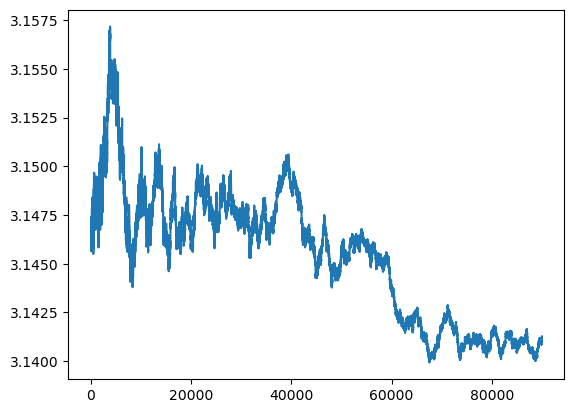

In [31]:
print("Number of points used (total pinballs): %s" % NN)
print("Value obtained: %s" % Area_arr[-1])
print("Error versus expected value: %s" % Exp)

# print(Area[:10]) #first few elements have wildly differing area values
plt.plot(Area[N_Start:NN]) #starting at the first 10% of the guesses ensures 'smoother' plots